In [1]:
import rasterio
import numpy as np
from sklearn.model_selection import train_test_split

from typing import Any, Dict, Optional, List
import utils
import main
import sys

In [34]:
# save_prediction

-1.346652

In [33]:
a=np.random.randn(2,1,1)
b=np.random.randn(2,1,1)
print(a)
print(b)
l=a+b
print(l)

[[[ 0.09771803]]

 [[-1.16380941]]]
[[[-1.44437387]]

 [[ 0.30727828]]]
[[[-1.34665584]]

 [[-0.85653113]]]


## Not useful 

In [ ]:
# steps in test time:
    # two 3D np arrays: pred_feat and pred_label
    # add padding in case they have incompatible shape
    # concatenate to get a single 3D array
    # get a valid_mask: A 2d array which has nan if any of the bands value is nan for every pixel.
    # filtered_stacked_data: nan for all bands if any band is nan otherwise the actual values 
    # pred_feat is the 9 bands 
    # pred label is the 2D array(1st band)
    # we compute pred_feat_mask and pred_label_mask which is useless
    # 


In [ ]:
# Done with scale, resolution and zoom level.
# scale is basivally how 
# Each band of an image can have diff scale and it can change depending on the image, the band is present in.
# Earth engine looks at the scale specified y the output and then finds out the approprate level of image pyramid to use as input.


In [ ]:
# when we ingect an image in an earth engine:
    # It is ingested at native resolution(the lowest level of image pyramid)
    # the image data are also aggregated to create higher pyramid levels.
    # The image data is aggregated until it fits within a 256*256 pixel tile.
    # 

In [ ]:
# Scale==pixel resolution
# Zoom level
# Image assests exists at multiple scales, in image pyramid
# The lowest level of the image is the image at native resolution. During ingestion the data are aggregated to create high pyramid levels. The two ways of aggregration are:
    # For continous values images: As we level up in pyramid, we take mean of 2*2 pixels 
    # For discrete values images: As we level up in pyramid, we take a sample (usually the top left pixel) of pixels at the next lower level
# We do the agregration till the entire image fits within 256*256 pixel tile.
# Each of this undivided squares which is divided  into 4 squares is called a tile.
# 

In [5]:
#  we have an instance(object) to the GCSfilesystem, we can reda , write, manage files, open files directly from Google Cloud Storage without downloading them locally.
# Now we can open the files with this opject and read it in binary mode.
# Read File Data:
"""f.read() reads the entire contents of the file into memory.
    BytesIO(f.read()) wraps the file bytes into a BytesIO object so it can be treated like a file object.

Load the TIFF File:

    rasterio_open(file_bytes) is used to open the file using the rasterio library, which is designed for working with geospatial raster data (e.g., GeoTIFF files).
    This function converts the in-memory BytesIO object into a raster data object.

Return the TIFF Object:

    The TIFF file object is returned for further processing"""
# Google cloud has multiple projects
# each project has its won resources(buckets, databases and compute instances)
# storage.Client(project=PROJECT_ID) creates an object that allows you to interact with resources belonging to a specific project identified by PROJECT_ID.
# Buckets are the top-level containers in Google Cloud Storage (like a drive or main folder).
# Inside a bucket, you can organize files using folder-like paths (e.g., folder1/subfolder/file.txt).
# Use the storage.Client to get a reference to the bucket with client.get_bucket(bucket_name)


# gcs_path is the path of the folder relative to your google cloud storage(has gs://bucket_name/path_to_folder)
# function that retrieves the bucket name file name on which the tiff is stored
# client.get_bucket(bucket_name) return an object that refers to that particular bucket
# In the end we need to close the connection to google cloud storage 

# Ideally, we get two tiff files(features and labels), the number of data points are m*n where each data point has b bands
# Removing the points which has -1 values (corresponsiding label)
# divioding the grid into train test split 
# 

'f.read() reads the entire contents of the file into memory.\n    BytesIO(f.read()) wraps the file bytes into a BytesIO object so it can be treated like a file object.\n\nLoad the TIFF File:\n\n    rasterio_open(file_bytes) is used to open the file using the rasterio library, which is designed for working with geospatial raster data (e.g., GeoTIFF files).\n    This function converts the in-memory BytesIO object into a raster data object.\n\nReturn the TIFF Object:\n\n    The TIFF file object is returned for further processing'

In [6]:
# test_features
# test_features_padded
# stacked_data
# valid_mask a 2D which is nan if any of the bands is nan or label is -1
# filtered_stacked_data is 3D on the basis of valid_mask (all 10 bands(9+label) is nan if valid_mask is nan otherwise org feature +label) 
# pred_feat is the 9 bands features
# pred_label is the firts channel
# nan_pred_feat and nan_pred_label are the  


In [12]:
# even if it ignores nan, if all values are nan, it gives nan.

import numpy as np
label_np=np.array([[3., -1, -1., 3.],
        [3., 1., 1., 3.],[3., -1, -1., 3.],
        [3., -1., -1., 2.],[3., -1, -1., 3.],
        [3., 1., 1., 3.],[3., -1, -1., 3.],
        [3., -1., -1., 2.]])
print(label_np)

import numpy as np

label_np=np.where(label_np==-1, np.nan, label_np)
print(label_np)
data=[]
for i in range(1,6):
        for j in range(1,3):
                temp_data=label_np[i-1:i+1,j-1:j+1]
                print(temp_data)
                print(np.nanmean(temp_data,axis=(0,1)))

                data.append(np.nanmean(temp_data,axis=(0,1)))
                #     label.append(data[0,i,j])
                    
print(data)

[[ 3. -1. -1.  3.]
 [ 3.  1.  1.  3.]
 [ 3. -1. -1.  3.]
 [ 3. -1. -1.  2.]
 [ 3. -1. -1.  3.]
 [ 3.  1.  1.  3.]
 [ 3. -1. -1.  3.]
 [ 3. -1. -1.  2.]]


In [13]:
temp=label_np[1,:2,1:3]
print(temp)
np.nanmean(temp,axis=1)

[[nan nan]
 [nan nan]]


/tmp/ipykernel_18005/3690321154.py:3: RuntimeWarning: Mean of empty slice
  np.nanmean(temp,axis=1)


array([nan, nan])

In [7]:
import numpy as np
label_np=np.array([[[3., -1, -1., 3.],
        [3., 1., 1., 3.]],[[3., -1, -1., 3.],
        [3., -1., -1., 2.]]])
label_np=np.where(label_np==-1, np.nan, label_np)
print(label_np)
mask=~np.isnan(label_np).any(axis=0)
print(mask)
masked_train_labels =label_np[:,mask]
print(masked_train_labels)
data=np.array([[[3., 6, 7., 3.],
        [3., 1., 1., 3.]],[[3., 1, 2., 3.],
        [3., 4., 1., 2.]]])
print(data)
d=data[:,0:2,0:2]
print(d.mean(axis=(1,2)))
a=[]
a.append(np.random.randn(4,1,1))
a.append(np.random.randn(4,1,1))
b=np.array(a)
print(b.shape)


[[[ 3. nan nan  3.]
  [ 3.  1.  1.  3.]]

 [[ 3. nan nan  3.]
  [ 3. nan nan  2.]]]
[[ True False False  True]
 [ True False False  True]]
[[3. 3. 3. 3.]
 [3. 3. 3. 2.]]
[[[3. 6. 7. 3.]
  [3. 1. 1. 3.]]

 [[3. 1. 2. 3.]
  [3. 4. 1. 2.]]]
[3.25 2.75]
(2, 4, 1, 1)


In [8]:
label_np=np.array([[[3., -1, -1., 3.],
        [3., 1., 1., 3.]],[[3., -1, -1., 3.],
        [3., -1., -1., 3.]]])
label_np=np.where(label_np==-1,np.nan,label_np)
nan_label=np.isnan(label_np)
print(nan_label)
nan_label_2=np.any(np.isnan(label_np),axis=0)
print(nan_label_2)
nan_label_3= np.isnan(label_np).any(axis=0)
print("last one",nan_label_3)

[[[False  True  True False]
  [False False False False]]

 [[False  True  True False]
  [False  True  True False]]]
[[False  True  True False]
 [False  True  True False]]
last one [[False  True  True False]
 [False  True  True False]]


In [9]:
import rasterio
from rasterio.windows import Window

height=8
width=8
block_coverage=1
total_blocks=4
total_pixels = height*width
pixels_covered = total_pixels*block_coverage
block_size = int(np.sqrt(pixels_covered/total_blocks))
print("block size",block_size)

# Generate windows for each grid
windows = []
for i in range(0, height-block_size+1, block_size):
    for j in range(0, width-block_size+1, block_size):
        print(i,j)

        windows.append(Window(j, i, block_size, block_size))

block size 4
0 0
0 4
4 0
4 4


## Arguments to be passed

In [2]:
train_feat_file="/home/nikki/Downloads/urbanization_data_export_22122024_2010-01-01_urban_feat.tif"
train_label_file="/home/nikki/Downloads/urbanization_data_export_22122024_2010-01-01_urban_label.tif"
test_feat_file="/home/nikki/Downloads/urbanization_data_export_22122024_2015-01-01_urban_feat.tiff"
test_label_file="/home/nikki/Downloads/urbanization_data_export_22122024_2015-01-01_urban_label.tiff"
output_path="output_file_conv_static.tiff"

block_coverage=0.3
total_blocks=100
test_size=0.3

## Loading the input files 

In [3]:

train_features=utils.rasterio_open(train_feat_file)
train_labels=utils.rasterio_open(train_label_file)
test_features=utils.rasterio_open(test_feat_file)
test_label=utils.rasterio_open(test_label_file)




In [9]:
print(train_features.metadata['width'])
print(train_features.metadata['height'])
train_features.data.shape

2238
2211


(9, 2211, 2238)

In [29]:
train_features.bands

('pdsi',
 'pr',
 'pr_1',
 'tmmn',
 'tmmx',
 'NDVI',
 'EVI',
 'LC_Type1',
 'population_density')

In [4]:
train_feature=np.concatenate((train_features.data[0,:,:].reshape(1,train_features.metadata['height'],train_features.metadata['width'] ), train_features.data[2:,:,:]), axis=0)
test_feature= np.concatenate((test_features.data[0,:,:].reshape(1,test_features.metadata['height'],test_features.metadata['width']),test_features.data[2:,:,:]),axis=0)


In [6]:
print(train_feature.shape)
print(test_feature.shape)

(8, 2211, 2238)
(8, 2211, 2238)


## Pre-processing

In [5]:
x_train,y_train,x_val,y_val,x_test,y_test=main.pre_process(train_feature,train_labels.data,test_feature, test_label.data, block_coverage, total_blocks,test_size)


block size 121
block size 121


  0%|          | 0/226 [00:00<?, ?it/s]/home/nikki/Downloads/urbanan_google_earth/main.py:289: RuntimeWarning: Mean of empty slice
  new_data.append(np.concatenate(((np.nanmean(mean_data,axis=(1,2))),static_data),axis=0 ))
100%|██████████| 324/324 [03:45<00:00,  1.44it/s]


(3093714, 15) (3093714,)
(1341522, 15) (1341522,)
(4435236, 15) (4435236,)


In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(3093714, 15)
(3093714, 1)
(4435236, 15)
(4435236,)
(1341522, 15)
(1341522,)


In [32]:
nan_x_train = ~np.any(np.isnan(x_train),axis=1)
nan_x_test = ~np.any(np.isnan(x_test),axis=1)
nan_x_val = ~np.any(np.isnan(x_val),axis=1)

x_train=x_train[nan_x_train]
x_test=x_test[nan_x_test]
x_val=x_val[nan_x_val]

y_train=y_train[nan_x_train]
y_test=y_test[nan_x_test]
y_val=y_val[nan_x_val]

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)


# nan_y_train=~np.isnan(y_test).reshape(4435236)



(2124782, 15)
(2124782, 1)
(3003316, 15)
(3003316,)
(878678, 15)
(878678,)


### Correlations Matrix

In [6]:
y_train=y_train.reshape(len(y_train),1)
print(y_train.shape)
train=np.concatenate((x_train, y_train), axis=1)
print(train.shape)
col_means = np.mean(train,axis=0)
print(col_means)
train_normalized = (train - col_means) / np.std(train, axis=0)
print(np.mean(train_normalized,axis=0))
print(np.std(train_normalized,axis=0))

(3093714, 1)
(3093714, 16)
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


In [7]:
coerr=np.corrcoef(train, rowvar=False)

In [8]:
coerr

array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan],
       [nan, nan, nan, nan, na

In [9]:
['pdsi','pr','pr','tmmn','tmmx','NDVI','EVI','LC_Type1','population_density','urban']

['pdsi',
 'pr',
 'pr',
 'tmmn',
 'tmmx',
 'NDVI',
 'EVI',
 'LC_Type1',
 'population_density',
 'urban']

/home/nikki/Downloads/venv/lib/python3.12/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/home/nikki/Downloads/venv/lib/python3.12/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


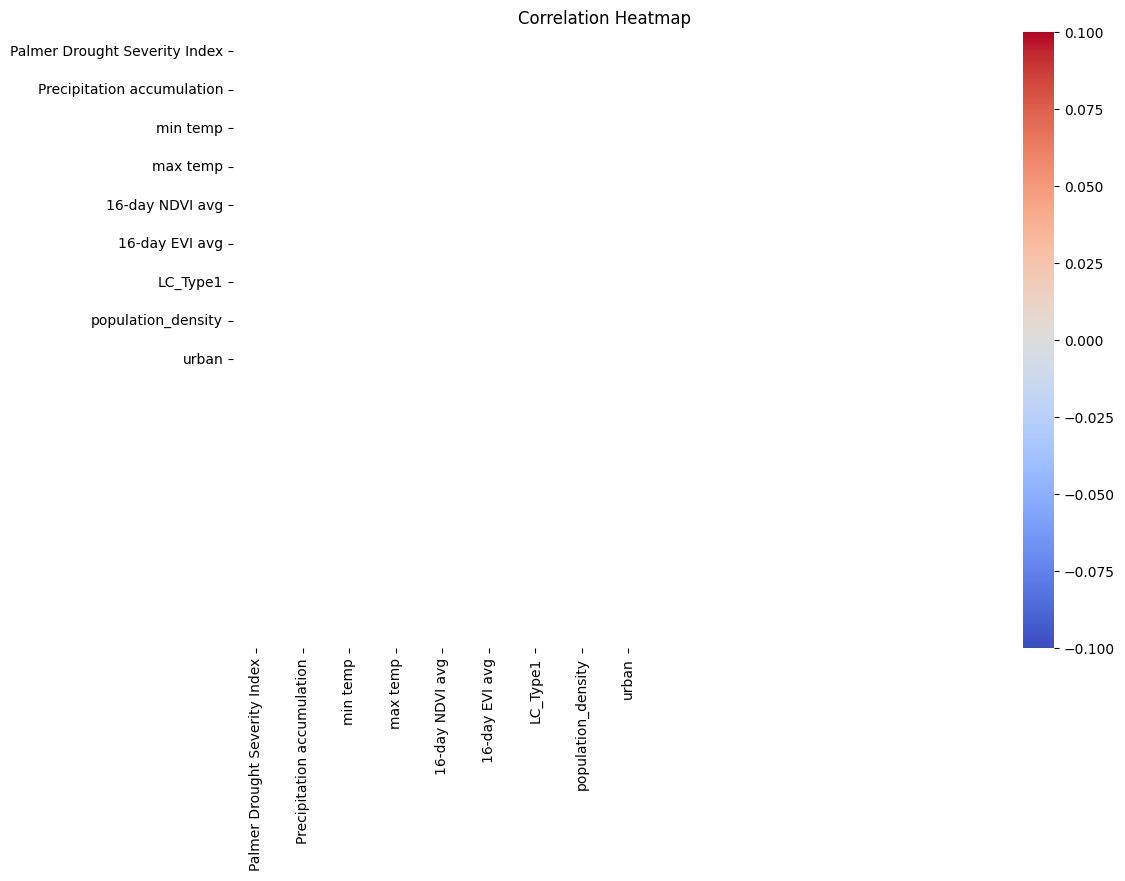

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(coerr, annot=True, xticklabels=['Palmer Drought Severity Index','Precipitation accumulation',
'min temp','max temp','16-day NDVI avg','16-day EVI avg','LC_Type1','population_density','urban'], yticklabels=['Palmer Drought Severity Index','Precipitation accumulation',
'min temp','max temp','16-day NDVI avg','16-day EVI avg','LC_Type1','population_density','urban'], cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Training

In [33]:
y_train= y_train.astype(np.int32)
x_train=x_train.astype(np.float64)
x_val=x_val.astype(np.float64)
y_val=y_val.astype(np.int32)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.int32)

In [34]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(objective="multiclass", num_class=4)
main.train(model,x_train,y_train,x_val,y_val)


/home/nikki/Downloads/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/nikki/Downloads/venv/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/home/nikki/Downloads/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3553
[LightGBM] [Info] Number of data points in the train set: 2124782, number of used features: 15
[LightGBM] [Info] Start training from score -5.972067
[LightGBM] [Info] Start training from score -7.375494
[LightGBM] [Info] Start training from score -6.251169
[LightGBM] [Info] Start training from score -0.005117


## Testing

In [38]:
test_pred,cm,report=main.predict(model,x_train,y_train)

/home/nikki/Downloads/venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [39]:
print(report)

              precision    recall  f1-score   support

           0       0.21      0.09      0.13      5416
           1       0.11      0.05      0.07      1331
           2       0.12      0.02      0.03      4097
           3       1.00      1.00      1.00   2113938

    accuracy                           0.99   2124782
   macro avg       0.36      0.29      0.31   2124782
weighted avg       0.99      0.99      0.99   2124782



In [40]:
print(cm)

[[    484       8       1    4923]
 [     22      63       2    1244]
 [     25       2      71    3999]
 [   1734     478     530 2111196]]


## Saving

In [16]:
def save_prediction(test_profile, test_pred,output_path):
    shape=(2211,2239)
    print(shape)
    valid_pred_mask=pred_label_mask.flatten()
    pred_array=np.full((shape[0]*shape[1]),np.nan)
    print(pred_array.shape)
    print(len(valid_pred_mask))
    transform=test_profile['transform']
    print(len(valid_pred_mask),pred_array.shape, len(test_pred))
    print(transform)
    

    pred_array[valid_pred_mask] = test_pred
    pred_array = pred_array.reshape((shape[0], shape[1]))
    with rasterio.open(output_path,"w",driver="GTiff",height=shape[0],width=shape[1],count=1,  dtype=pred_array.dtype,crs=test_profile['crs'],transform=transform) as dst:
        dst.write(pred_array, 1)
main.save_prediction(test_features.profile,test_pred,output_path)

(2211, 2239)
(4950429,)
4950429
4950429 (4950429,) 3003316
| 0.01, 0.00, 67.81|
| 0.00,-0.01, 37.58|
| 0.00, 0.00, 1.00|


ValueError: NumPy boolean array indexing assignment cannot assign 3003316 input values to the 3312817 output values where the mask is true

In [19]:
test_pred.shape

(3003316,)

In [20]:
y_test.shape

(3003316,)

In [21]:
2211*2239

4950429

In [17]:
test_mask.shape

(2211, 2239)

In [18]:
test_profile=test_features.profile
shape=(2211,2239)
print(shape)
valid_pred_mask=test_mask.flatten()
pred_array=np.full((shape[0]*shape[1]),np.nan)
print(pred_array.shape)
print(len(valid_pred_mask))
transform=test_profile['transform']
print(len(valid_pred_mask),pred_array.shape, len(test_pred))
print(transform)


pred_array[valid_pred_mask] = test_pred
pred_array = pred_array.reshape((shape[0], shape[1]))
with rasterio.open(output_path,"w",driver="GTiff",height=shape[0],width=shape[1],count=1,  dtype=pred_array.dtype,crs=test_profile['crs'],transform=transform) as dst:
    dst.write(pred_array, 1)



(2211, 2239)
(4950429,)
4950429
4950429 (4950429,) 3003316
| 0.01, 0.00, 67.81|
| 0.00,-0.01, 37.58|
| 0.00, 0.00, 1.00|


ValueError: NumPy boolean array indexing assignment cannot assign 3003316 input values to the 3312817 output values where the mask is true

In [11]:
test_profile['crs']

CRS.from_wkt('GEOGCS["unknown",DATUM["unknown",SPHEROID["Spheroid",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]')

In [12]:
out=utils.rasterio_open("output_file_1.tiff")
print(out.profile)

{'driver': 'GTiff', 'dtype': 'float64', 'nodata': None, 'width': 2239, 'height': 2211, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["unknown",DATUM["unknown",SPHEROID["Spheroid",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.013474729261792823, 0.0, 67.81374585363181,
       0.0, -0.013474729261792823, 37.58330317162592), 'blockxsize': 2239, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}


In [14]:
print(test_profile)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 2238, 'height': 2211, 'count': 9, 'crs': CRS.from_wkt('GEOGCS["unknown",DATUM["unknown",SPHEROID["Spheroid",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.013474729261792823, 0.0, 67.81374585363181,
       0.0, -0.013474729261792823, 37.58330317162592), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'pixel'}
